This notebook provides the same hysteresis analysis as Hysteresis_density_temp_analysis.ipynb but with the updated fitting algorithm

In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
from fitting import fit
import RockSat_json.RockSat_json 
import fitting.RockSat_1_14_fitting_functions as R_fitting
plt.rcParams['text.usetex']=True

In [3]:
packets = RockSat_json.RockSat_json.import_data(f"C:/Users/carso/OneDrive/Documents/DAPPEr/Github/DAPPEr/Data/UDIP_4_800s.json")

In [4]:
f_high_start = 8
f_high_stop = 51
f_low_start = 211
f_low_stop = 254
b = 300
d_low_start = 8
d_low_stop = 70
d_high_start = 190
d_high_stop = 252
a = 36

In [9]:
print(packets['packets']['Full']['300']['Start'] / 1000) 

223.412


In [ ]:
full_times = []
dense_times = []
full_areas=[]
dense_areas = []
dense_nums = []
full_nums = []
full_rect = []
dense_rect = []
dense_hys= []
full_hys = []
full_densities = []
dense_densities = []
full_temps = []
dense_temps = []
for sweep in range(130,525):
    V = np.array(packets['packets']['Full'][f'{sweep}']['Voltage'])
    I = np.array(packets['packets']['Full'][f'{sweep}']['Current0']) * -1.e9 
    _,_,popt,_ = fit.gen_fit(V[6:],I[6:])
    full_densities.append(popt[4])
    full_temps.append(popt[5])
    V_high = V[f_high_start:f_high_stop]
    V_high = V_high[::-1]
    V_low = V[f_low_start:f_low_stop]
    I_high = I[f_high_start:f_high_stop]
    I_high = I_high[::-1]
    I_low = I[f_low_start:f_low_stop]
    full_times.append((packets['packets']['Full'][f'{sweep}']['Start'] / 1000) + 57)
    full_nums.append(sweep)#for historesis vs sweep #
    sum = 0
    for i in range(1, len(V_high), 1):
        delta_V = np.abs(V_high[i] - V_high[i-1])
        sum += delta_V * np.abs(I_high[i] - I_low[i])
    full_areas.append(sum)
    full_rect.append(np.abs(V_low[0] - V_low[-1]) * np.percentile(I, 95))
    full_hys.append(sum / (np.abs(V_low[0] - V_low[-1]) * np.percentile(I, 95)))
     
for sweep in range(20,40):
    V = np.array(packets['packets']['Dense'][f'{sweep}']['Voltage'])
    I = np.array(packets['packets']['Dense'][f'{sweep}']['Current0']) * -1.e9
    _,_,popt,_ = fit.gen_fit(V[6:],I[6:])
    dense_densities.append(popt[4])
    dense_temps.append(popt[5])
    dense_times.append(packets['packets']['Full'][f'{sweep}']['Start'] / 1000)
    dense_nums.append(sweep) #for historesis vs sweep #
    sum = 0
    V_high = V[d_high_start:d_high_stop]
    V_low = V[d_low_start:d_low_stop]
    V_low = V_low[::-1]
    I_high = I[d_high_start:d_high_stop]
    I_low = I[d_low_start:d_low_stop]
    I_low = I_low[::-1]
    for i in range(1, len(V_high), 1):
        delta_V = np.abs(V_high[i] - V_high[i-1])
        sum += delta_V * np.abs(I_high[i] - I_low[i])
    dense_areas.append(sum)
    dense_rect.append(np.abs(V_low[0] - V_low[-1]) * np.percentile(I, 95))
    dense_hys.append(sum / (np.abs(V_low[0] - V_low[-1]) * np.percentile(I, 95)))
    

C:\Users\carso\OneDrive\Documents\DAPPEr\Github\DAPPEr\src\fitting\fit.py:117: RuntimeWarning: invalid value encountered in sqrt
  return I0 * np.sqrt(1. + k*(x - V0))


In [ ]:
#shifting because the dense sweeps are mislabeled in the json
dense_nums = np.array(dense_nums)
full_nums = np.array(full_nums)
for i in range(0,320):
    full_nums[i] += i // 10
dense_nums *= 10

In [ ]:
import pandas as pd
df = pd.read_csv("ne 3 1.csv", delimiter=",", header = 0)


<bound method NDFrame.keys of         time           ne       ne_err
0    107.677  2497.718012  4114.747569
1    108.225  2869.658332   486.259071
2    108.703  7071.288544          inf
3    109.133    -0.000001          NaN
4    109.494  7071.288544          inf
..       ...          ...          ...
895  456.732  7071.288544          inf
896  457.081  7071.288544          inf
897  457.426  7071.288544          inf
898  457.771  7071.288544          inf
899  458.120  7071.288544          inf

[900 rows x 3 columns]>


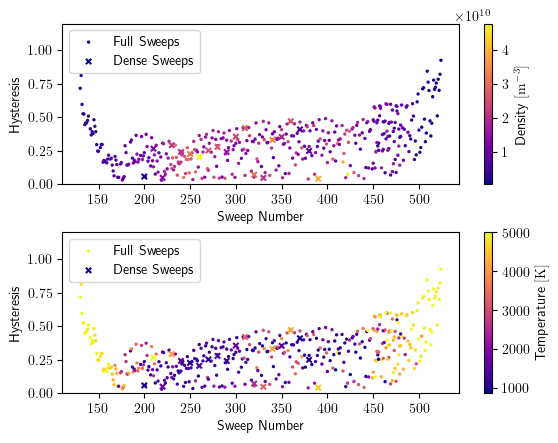

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)

sc1 = ax[0].scatter(full_nums, full_hys,c=full_densities, cmap = "plasma", s =2)
ax[0].scatter(dense_nums, dense_hys, c = dense_densities, cmap = "plasma",s=15,  marker='x')
ax[0].legend([r"Full Sweeps", r"Dense Sweeps"])
ax[0].set_xlabel(r"Sweep Number")
ax[0].set_ylabel(r"Hysteresis")
ax[0].set_ylim([0., 1.2])
fig.colorbar( sc1, ax = ax[0], label=r"Density $\rm [m^{-3}]$")
plt.subplots_adjust(hspace=0.3)
sc2 = ax[1].scatter(full_nums, full_hys,c=full_temps, cmap = "plasma", s =2)
ax[1].scatter(dense_nums, dense_hys, c = dense_temps, cmap = "plasma",s=15,  marker='x')
ax[1].legend([r"Full Sweeps", r"Dense Sweeps"])
ax[1].set_xlabel(r"Sweep Number")
ax[1].set_ylabel(r"Hysteresis ")
ax[1].set_ylim([0., 1.2])
fig.colorbar(sc2, ax = ax[1], label= r"Temperature $\rm [K]$")
#plt.savefig("Hysteresis_Temp_Density.pdf")

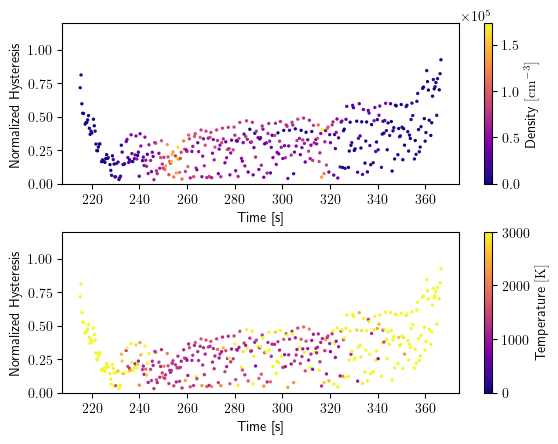

In [ ]:
#Figure for paper
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(nrows = 2, ncols = 1)

sc1 = ax[0].scatter(full_times, full_hys,c=df["ne"][130:525], cmap = "plasma", s =2)
ax[0].set_xlabel(r"Time [s]")
ax[0].set_ylabel(r"Normalized Hysteresis")
ax[0].set_ylim([0., 1.2])
cbar1 = fig.colorbar(sc1, ax=ax[0], label=r"Density $\rm [cm^{-3}]$")
cbar1.formatter = ScalarFormatter()
cbar1.formatter.set_scientific(True)
cbar1.formatter.set_powerlimits((0, 0))
cbar1.update_ticks()
plt.subplots_adjust(hspace=0.3)
sc2 = ax[1].scatter(full_times, full_hys,c=full_temps, cmap = "plasma", s =2, vmin = 0, vmax = 3000)
ax[1].set_xlabel(r"Time [s]")
ax[1].set_ylabel(r"Normalized Hysteresis ")
ax[1].set_ylim([0., 1.2])
fig.colorbar(sc2, ax = ax[1], label= r"Temperature $\rm [K]$")
plt.savefig(r"hyst_temp_dense_plot.png")